In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from tensorflow import keras
from tensorflow.keras import layers, callbacks

In [2]:
data = pd.read_csv("data.csv")
data

,year,country,gdp,foreign_direct_investment,gross_savings,unemployment,labor_force,mortality_rate,new_businesses_registered,education_expenditure,...,manufacturing,tobacco_use,profit_tax,population,literacy_rate,birth_rate,death_rate,migration,agriculture_forestry_fishing,industry
0,2015,Afghanistan,1.990711e+10,-166983554.9,NaN,NaN,9.175691e+06,70.400000,2255.0,5.211486e+08,...,2.273393e+09,NaN,0.0,3.441360e+07,NaN,34.809000,6.929000,NaN,4.107698e+09,4.404258e+09
1,2015,Albania,1.138685e+10,-910256726.0,1.919494e+09,17.190001,1.302893e+06,9.600000,2616.0,3.599446e+08,...,6.458039e+08,NaN,14.1,2.880703e+06,NaN,12.197000,7.367000,NaN,2.252344e+09,2.478195e+09
2,2015,Algeria,1.663615e+11,638915215.3,6.056741e+10,11.210000,1.187871e+07,25.200000,8093.0,7.217958e+09,...,3.803587e+10,NaN,6.5,3.972802e+07,NaN,25.481000,4.715000,NaN,1.926252e+10,6.051998e+10
3,2015,American Samoa,6.610000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.581200e+04,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,Andorra,2.789870e+09,NaN,NaN,NaN,NaN,3.500000,NaN,NaN,...,NaN,NaN,NaN,7.801100e+04,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5275,1996,Sub-Saharan Africa,3.698492e+11,NaN,NaN,NaN,2.308875e+08,166.600000,NaN,NaN,...,5.564251e+10,NaN,NaN,5.990678e+08,55.028782,42.399095,15.626140,NaN,6.399618e+10,1.114528e+11
5276,1996,Sub-Saharan Africa (excluding high income),3.649033e+11,NaN,NaN,NaN,2.303960e+08,166.571238,NaN,NaN,...,5.464150e+10,NaN,NaN,5.978574e+08,54.953522,42.447528,15.643933,NaN,6.357182e+10,1.100384e+11
5277,1996,Sub-Saharan Africa (IDA & IBRD countries),3.698492e+11,NaN,NaN,NaN,2.308875e+08,166.441421,NaN,NaN,...,5.564251e+10,NaN,NaN,5.990678e+08,55.028782,42.399095,15.626140,NaN,6.399618e+10,1.114528e+11
5278,1996,Upper middle income,4.274728e+12,NaN,NaN,4.674947,1.179868e+09,44.600000,NaN,NaN,...,NaN,NaN,NaN,2.355410e+09,85.241333,18.832859,7.153478,NaN,4.411551e+11,1.470188e+12


In [15]:
# data.isnull().sum() / data.shape[0]
data.isnull().sum()

gdp                             0
foreign_direct_investment       0
gross_savings                   0
unemployment                    0
labor_force                     0
mortality_rate                  0
new_businesses_registered       0
education_expenditure           0
age_dependency_ratio            0
food_production_index           0
human_capital_index             0
imports                         0
exports                         0
life_expectancy_birth           0
manufacturing                   0
tobacco_use                     0
profit_tax                      0
population                      0
literacy_rate                   0
birth_rate                      0
death_rate                      0
migration                       0
agriculture_forestry_fishing    0
industry                        0
gdp_per_capita                  0
dtype: int64

In [4]:
# data.loc[:2904, :].isnull().sum() / 2904

In [5]:
# data.drop(['Time Code', 'Country Code'], axis=1, inplace=True)

In [6]:
data.dropna(subset=['gdp'], inplace=True)
data

,year,country,gdp,foreign_direct_investment,gross_savings,unemployment,labor_force,mortality_rate,new_businesses_registered,education_expenditure,...,manufacturing,tobacco_use,profit_tax,population,literacy_rate,birth_rate,death_rate,migration,agriculture_forestry_fishing,industry
0,2015,Afghanistan,1.990711e+10,-166983554.9,NaN,NaN,9.175691e+06,70.400000,2255.0,5.211486e+08,...,2.273393e+09,NaN,0.0,3.441360e+07,NaN,34.809000,6.929000,NaN,4.107698e+09,4.404258e+09
1,2015,Albania,1.138685e+10,-910256726.0,1.919494e+09,17.190001,1.302893e+06,9.600000,2616.0,3.599446e+08,...,6.458039e+08,NaN,14.1,2.880703e+06,NaN,12.197000,7.367000,NaN,2.252344e+09,2.478195e+09
2,2015,Algeria,1.663615e+11,638915215.3,6.056741e+10,11.210000,1.187871e+07,25.200000,8093.0,7.217958e+09,...,3.803587e+10,NaN,6.5,3.972802e+07,NaN,25.481000,4.715000,NaN,1.926252e+10,6.051998e+10
3,2015,American Samoa,6.610000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.581200e+04,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,Andorra,2.789870e+09,NaN,NaN,NaN,NaN,3.500000,NaN,NaN,...,NaN,NaN,NaN,7.801100e+04,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5275,1996,Sub-Saharan Africa,3.698492e+11,NaN,NaN,NaN,2.308875e+08,166.600000,NaN,NaN,...,5.564251e+10,NaN,NaN,5.990678e+08,55.028782,42.399095,15.626140,NaN,6.399618e+10,1.114528e+11
5276,1996,Sub-Saharan Africa (excluding high income),3.649033e+11,NaN,NaN,NaN,2.303960e+08,166.571238,NaN,NaN,...,5.464150e+10,NaN,NaN,5.978574e+08,54.953522,42.447528,15.643933,NaN,6.357182e+10,1.100384e+11
5277,1996,Sub-Saharan Africa (IDA & IBRD countries),3.698492e+11,NaN,NaN,NaN,2.308875e+08,166.441421,NaN,NaN,...,5.564251e+10,NaN,NaN,5.990678e+08,55.028782,42.399095,15.626140,NaN,6.399618e+10,1.114528e+11
5278,1996,Upper middle income,4.274728e+12,NaN,NaN,4.674947,1.179868e+09,44.600000,NaN,NaN,...,NaN,NaN,NaN,2.355410e+09,85.241333,18.832859,7.153478,NaN,4.411551e+11,1.470188e+12


In [7]:
data.drop(['year', 'country'], axis=1, inplace=True)

In [8]:
data.head()

,gdp,foreign_direct_investment,gross_savings,unemployment,labor_force,mortality_rate,new_businesses_registered,education_expenditure,age_dependency_ratio,food_production_index,...,manufacturing,tobacco_use,profit_tax,population,literacy_rate,birth_rate,death_rate,migration,agriculture_forestry_fishing,industry
0,1.990711e+10,-166983554.9,NaN,NaN,9175691.0,70.4,2255.0,5.211486e+08,89.954092,119.00,...,2.273393e+09,NaN,0.0,34413603.0,NaN,34.809,6.929,NaN,4.107698e+09,4.404258e+09
1,1.138685e+10,-910256726.0,1.919494e+09,17.190001,1302893.0,9.6,2616.0,3.599446e+08,45.550402,145.71,...,6.458039e+08,NaN,14.1,2880703.0,NaN,12.197,7.367,NaN,2.252344e+09,2.478195e+09
2,1.663615e+11,638915215.3,6.056741e+10,11.210000,11878706.0,25.2,8093.0,7.217958e+09,52.837788,151.00,...,3.803587e+10,NaN,6.5,39728025.0,NaN,25.481,4.715,NaN,1.926252e+10,6.051998e+10
3,6.610000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.15,...,NaN,NaN,NaN,55812.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2.789870e+09,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,78011.0,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
columns = data.columns
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
# imp.fit(data.drop(['country'], axis=1))
data = pd.DataFrame(imp.fit_transform(data), columns=columns)
data

,gdp,foreign_direct_investment,gross_savings,unemployment,labor_force,mortality_rate,new_businesses_registered,education_expenditure,age_dependency_ratio,food_production_index,...,tobacco_use,profit_tax,population,literacy_rate,birth_rate,death_rate,migration,agriculture_forestry_fishing,industry,gdp_per_capita
0,1.990711e+10,-1.669836e+08,8.462438e+10,8.438023,9.175691e+06,70.400000,2255.0,5.211486e+08,89.954092,119.000000,...,25.092807,0.00000,3.441360e+07,78.922721,34.809000,6.929000,-440402.018359,4.107698e+09,4.404258e+09,578.466353
1,1.138685e+10,-9.102567e+08,1.919494e+09,17.190001,1.302893e+06,9.600000,2616.0,3.599446e+08,45.550402,145.710000,...,25.092807,14.10000,2.880703e+06,78.922721,12.197000,7.367000,-440402.018359,2.252344e+09,2.478195e+09,3952.801215
2,1.663615e+11,6.389152e+08,6.056741e+10,11.210000,1.187871e+07,25.200000,8093.0,7.217958e+09,52.837788,151.000000,...,25.092807,6.50000,3.972802e+07,78.922721,25.481000,4.715000,-440402.018359,1.926252e+10,6.051998e+10,4187.509727
3,6.610000e+08,1.739573e+08,8.462438e+10,8.438023,1.372200e+08,46.911030,28735.5,1.164406e+10,63.159764,120.150000,...,25.092807,16.66987,5.581200e+04,78.922721,22.924219,8.591880,-440402.018359,8.385409e+10,5.088541e+11,11843.331183
4,2.789870e+09,1.739573e+08,8.462438e+10,8.438023,1.372200e+08,3.500000,28735.5,1.164406e+10,63.159764,102.319550,...,25.092807,16.66987,7.801100e+04,78.922721,22.924219,8.591880,-440402.018359,8.385409e+10,5.088541e+11,35762.523080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4959,3.698492e+11,1.739573e+08,8.462438e+10,8.438023,2.308875e+08,166.600000,28735.5,1.164406e+10,92.117754,74.379228,...,25.092807,16.66987,5.990678e+08,55.028782,42.399095,15.626140,-440402.018359,6.399618e+10,1.114528e+11,617.374570
4960,3.649033e+11,1.739573e+08,8.462438e+10,8.438023,2.303960e+08,166.571238,28735.5,1.164406e+10,92.204059,74.336680,...,25.092807,16.66987,5.978574e+08,54.953522,42.447528,15.643933,-440402.018359,6.357182e+10,1.100384e+11,610.351740
4961,3.698492e+11,1.739573e+08,8.462438e+10,8.438023,2.308875e+08,166.441421,28735.5,1.164406e+10,92.117754,74.379228,...,25.092807,16.66987,5.990678e+08,55.028782,42.399095,15.626140,-440402.018359,6.399618e+10,1.114528e+11,617.374570
4962,4.274728e+12,1.739573e+08,8.462438e+10,4.674947,1.179868e+09,44.600000,28735.5,1.164406e+10,54.734372,73.437731,...,25.092807,16.66987,2.355410e+09,85.241333,18.832859,7.153478,-440402.018359,4.411551e+11,1.470188e+12,1814.855153


In [10]:
data['gdp_per_capita'] = data.gdp / data.population
data.head()

,gdp,foreign_direct_investment,gross_savings,unemployment,labor_force,mortality_rate,new_businesses_registered,education_expenditure,age_dependency_ratio,food_production_index,...,tobacco_use,profit_tax,population,literacy_rate,birth_rate,death_rate,migration,agriculture_forestry_fishing,industry,gdp_per_capita
0,1.990711e+10,-1.669836e+08,8.462438e+10,8.438023,9.175691e+06,70.40000,2255.0,5.211486e+08,89.954092,119.00000,...,25.092807,0.00000,34413603.0,78.922721,34.809000,6.92900,-440402.018359,4.107698e+09,4.404258e+09,578.466353
1,1.138685e+10,-9.102567e+08,1.919494e+09,17.190001,1.302893e+06,9.60000,2616.0,3.599446e+08,45.550402,145.71000,...,25.092807,14.10000,2880703.0,78.922721,12.197000,7.36700,-440402.018359,2.252344e+09,2.478195e+09,3952.801215
2,1.663615e+11,6.389152e+08,6.056741e+10,11.210000,1.187871e+07,25.20000,8093.0,7.217958e+09,52.837788,151.00000,...,25.092807,6.50000,39728025.0,78.922721,25.481000,4.71500,-440402.018359,1.926252e+10,6.051998e+10,4187.509727
3,6.610000e+08,1.739573e+08,8.462438e+10,8.438023,1.372200e+08,46.91103,28735.5,1.164406e+10,63.159764,120.15000,...,25.092807,16.66987,55812.0,78.922721,22.924219,8.59188,-440402.018359,8.385409e+10,5.088541e+11,11843.331183
4,2.789870e+09,1.739573e+08,8.462438e+10,8.438023,1.372200e+08,3.50000,28735.5,1.164406e+10,63.159764,102.31955,...,25.092807,16.66987,78011.0,78.922721,22.924219,8.59188,-440402.018359,8.385409e+10,5.088541e+11,35762.523080


In [11]:
X = data.drop(['gdp', 'gdp_per_capita'], axis=1)
y = data.gdp_per_capita

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [21]:
input_shape = [X_train.shape[1]]

In [40]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    # layers.BatchNormalization(),
    # layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1),
])

In [41]:
model.compile(
    optimizer='adam',
    loss='mae',
    metrics=['mae'],
)

early_stopping = callbacks.EarlyStopping(
    min_delta=0.1,
    patience=20,
    restore_best_weights=True,
)

Epoch 1/100
32/32 [==============================] - 0s 11ms/step - loss: 10530.9756 - mae: 10530.9756 - val_loss: 8982.6406 - val_mae: 8982.6406
Epoch 2/100
32/32 [==============================] - 0s 12ms/step - loss: 10478.0986 - mae: 10478.0986 - val_loss: 9015.5781 - val_mae: 9015.5781
Epoch 3/100
32/32 [==============================] - 0s 12ms/step - loss: 10416.3926 - mae: 10416.3926 - val_loss: 8919.1201 - val_mae: 8919.1201
Epoch 4/100
32/32 [==============================] - 0s 12ms/step - loss: 10361.3701 - mae: 10361.3701 - val_loss: 8814.1221 - val_mae: 8814.1221
Epoch 5/100
32/32 [==============================] - 0s 13ms/step - loss: 10302.4775 - mae: 10302.4775 - val_loss: 8794.2861 - val_mae: 8794.2861
Epoch 6/100
32/32 [==============================] - 0s 12ms/step - loss: 10245.1982 - mae: 10245.1982 - val_loss: 8644.1250 - val_mae: 8644.1250
Epoch 7/100
32/32 [==============================] - 0s 8ms/step - loss: 10185.2305 - mae: 10185.2305 - val_loss: 8655.7881 

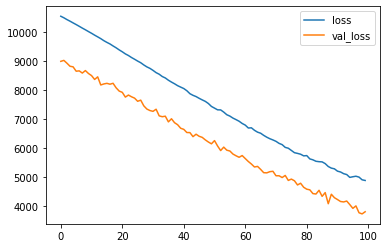

In [43]:
epochs = 100
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    batch_size=128,
    epochs=epochs,
    callbacks=[early_stopping],
    verbose=1,
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))